In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [43]:
df = pd.read_csv("CTA_data.csv")

In [44]:
df.dropna(axis=0, inplace = True)
df['date'] = pd.to_datetime(df['service_date'])

In [45]:
df.head()

,service_date,day_type,bus,rail_boardings,total_rides,date
0,01/01/2001,U,297192,126455,423647,2001-01-01
1,01/02/2001,W,780827,501952,1282779,2001-01-02
2,01/03/2001,W,824923,536432,1361355,2001-01-03
3,01/04/2001,W,870021,550011,1420032,2001-01-04
4,01/05/2001,W,890426,557917,1448343,2001-01-05


In [46]:
df.drop(columns= ['service_date'], axis = 1, inplace = True)
df.set_index('date', inplace = True)

In [47]:
mean = df.resample('M').mean()
median = df.resample('M').median()
std = df.resample('M').std()

list = [mean, median, std]
name = ['Time Series - Mean','Time Series - Median','Time Series - Standard Deviation']

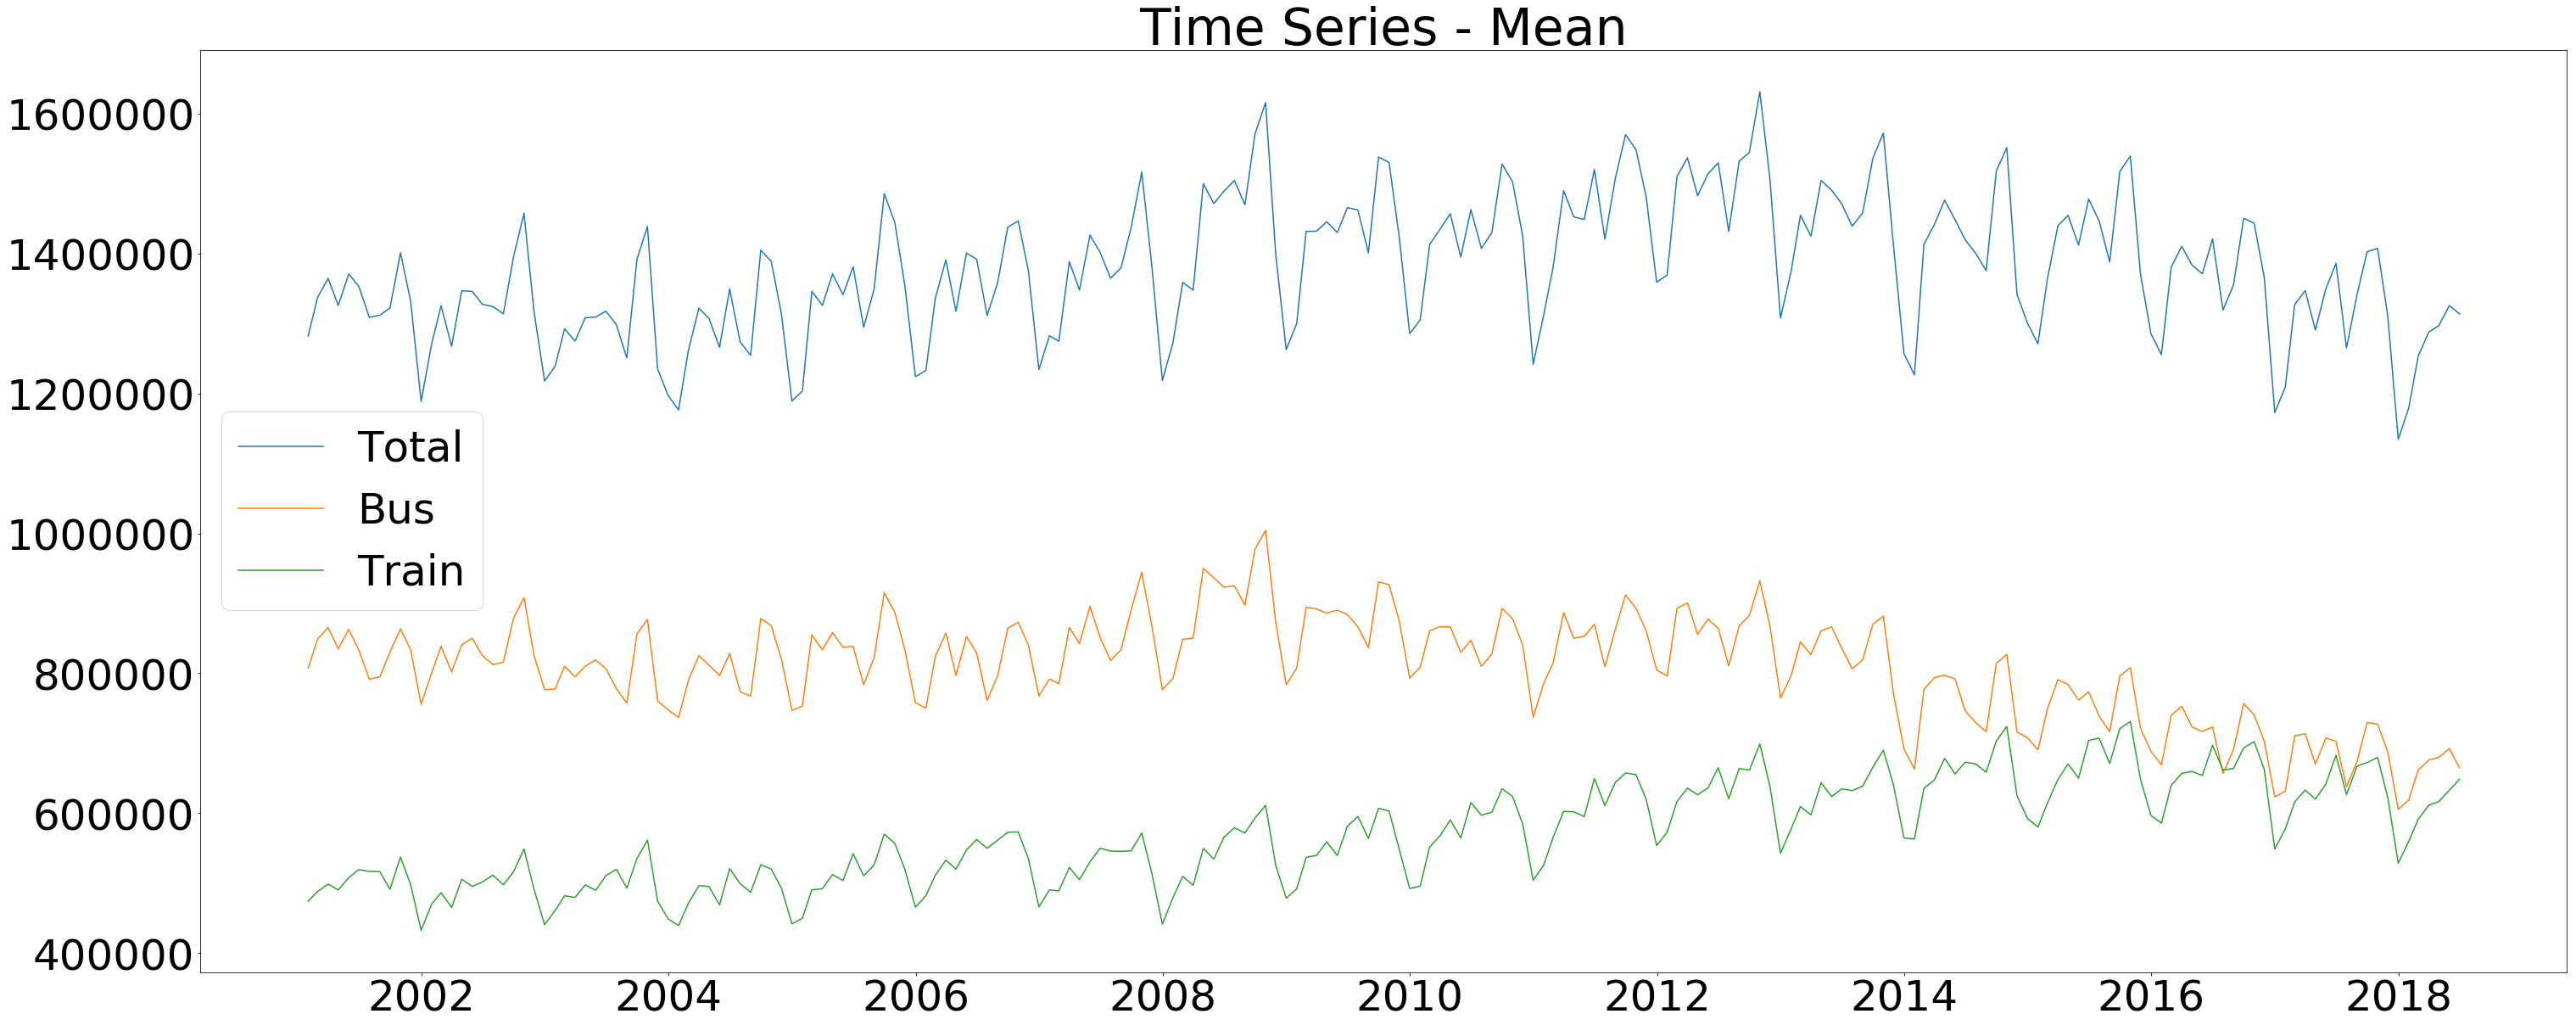

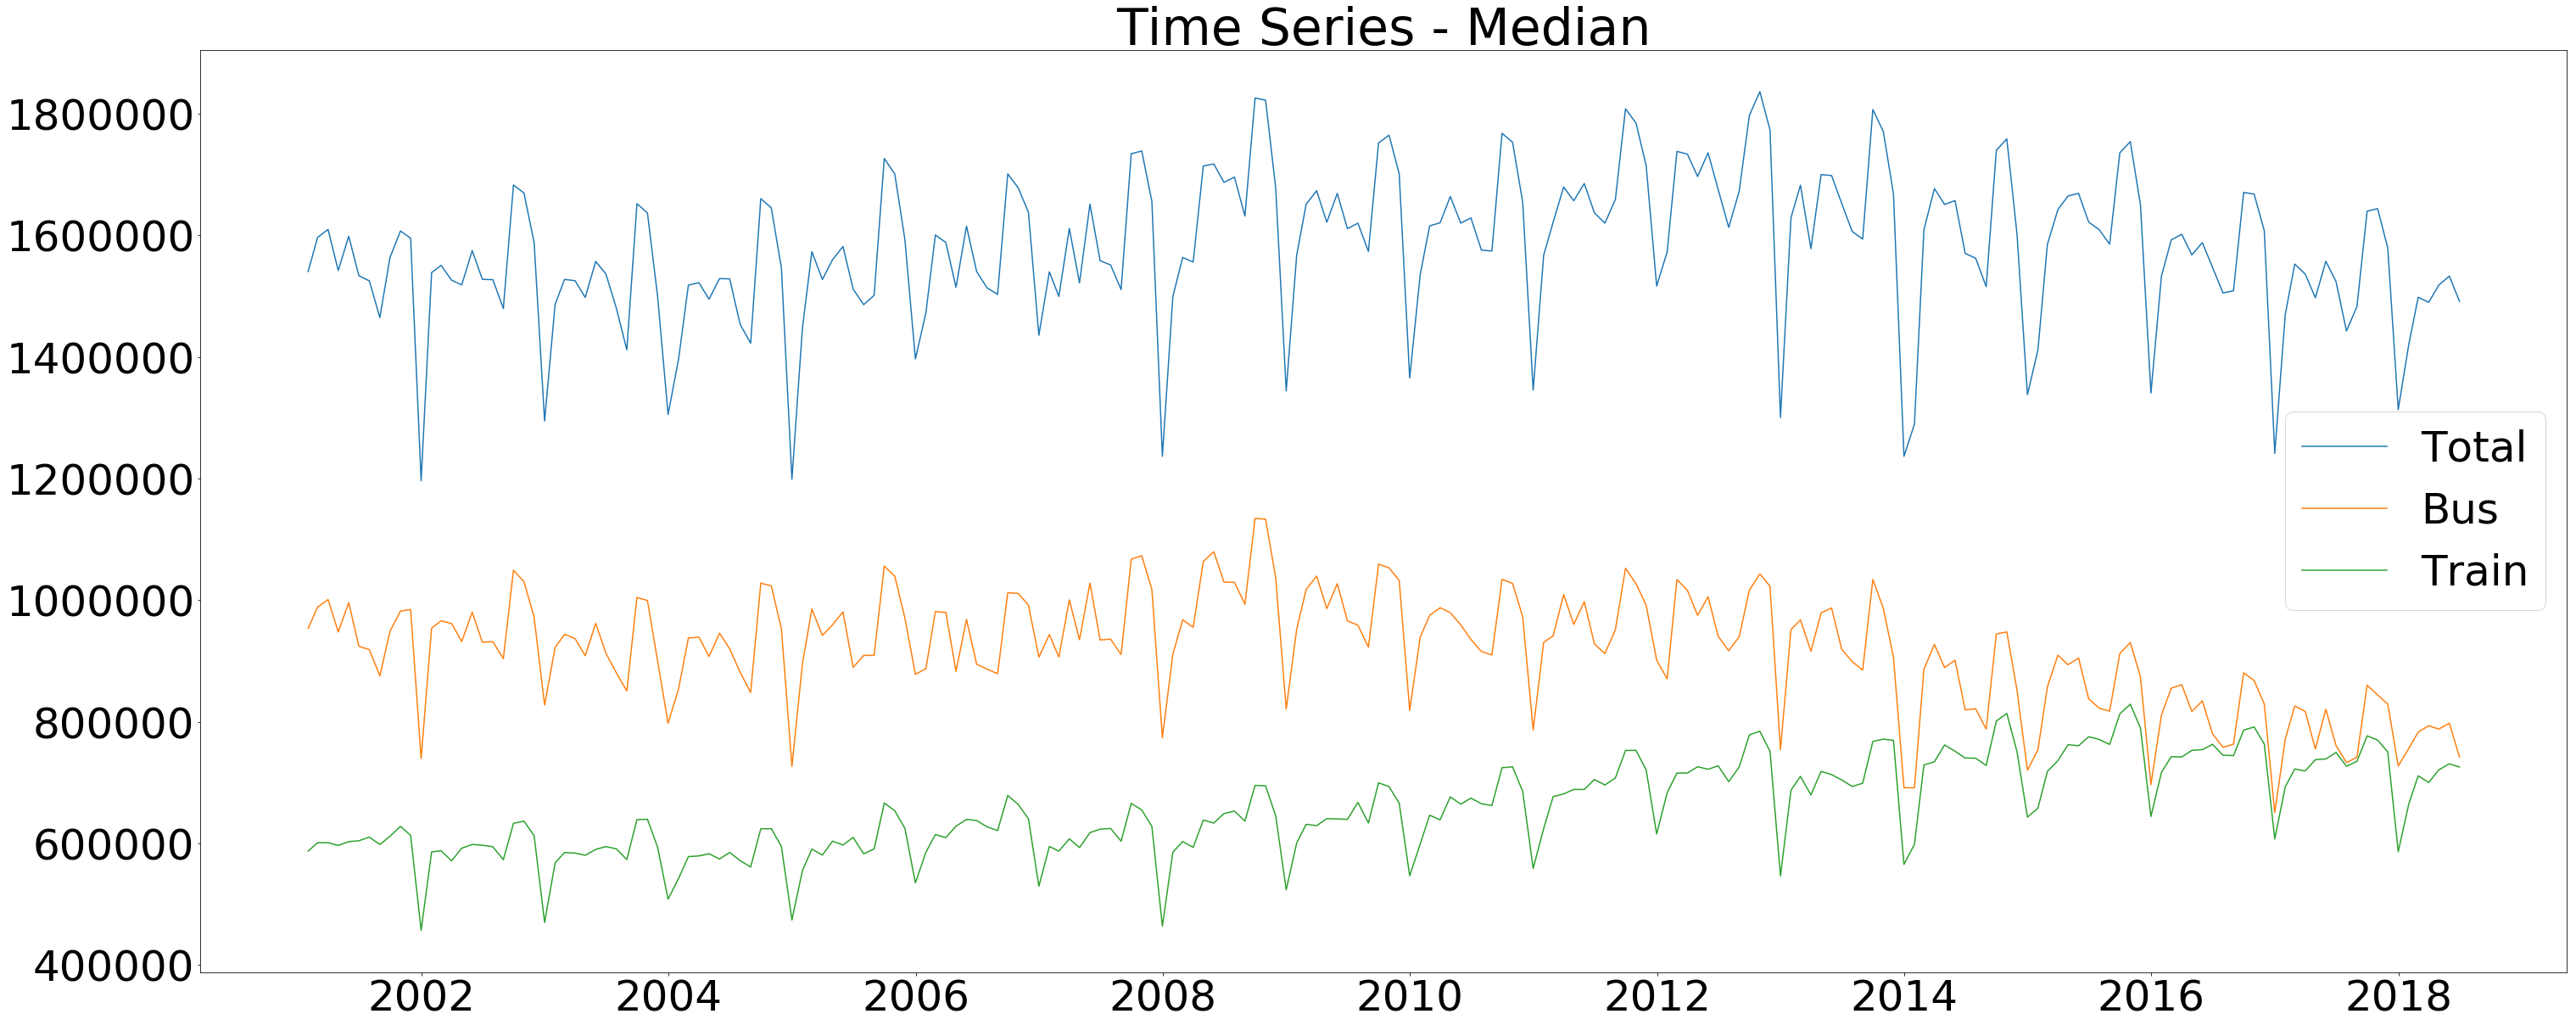

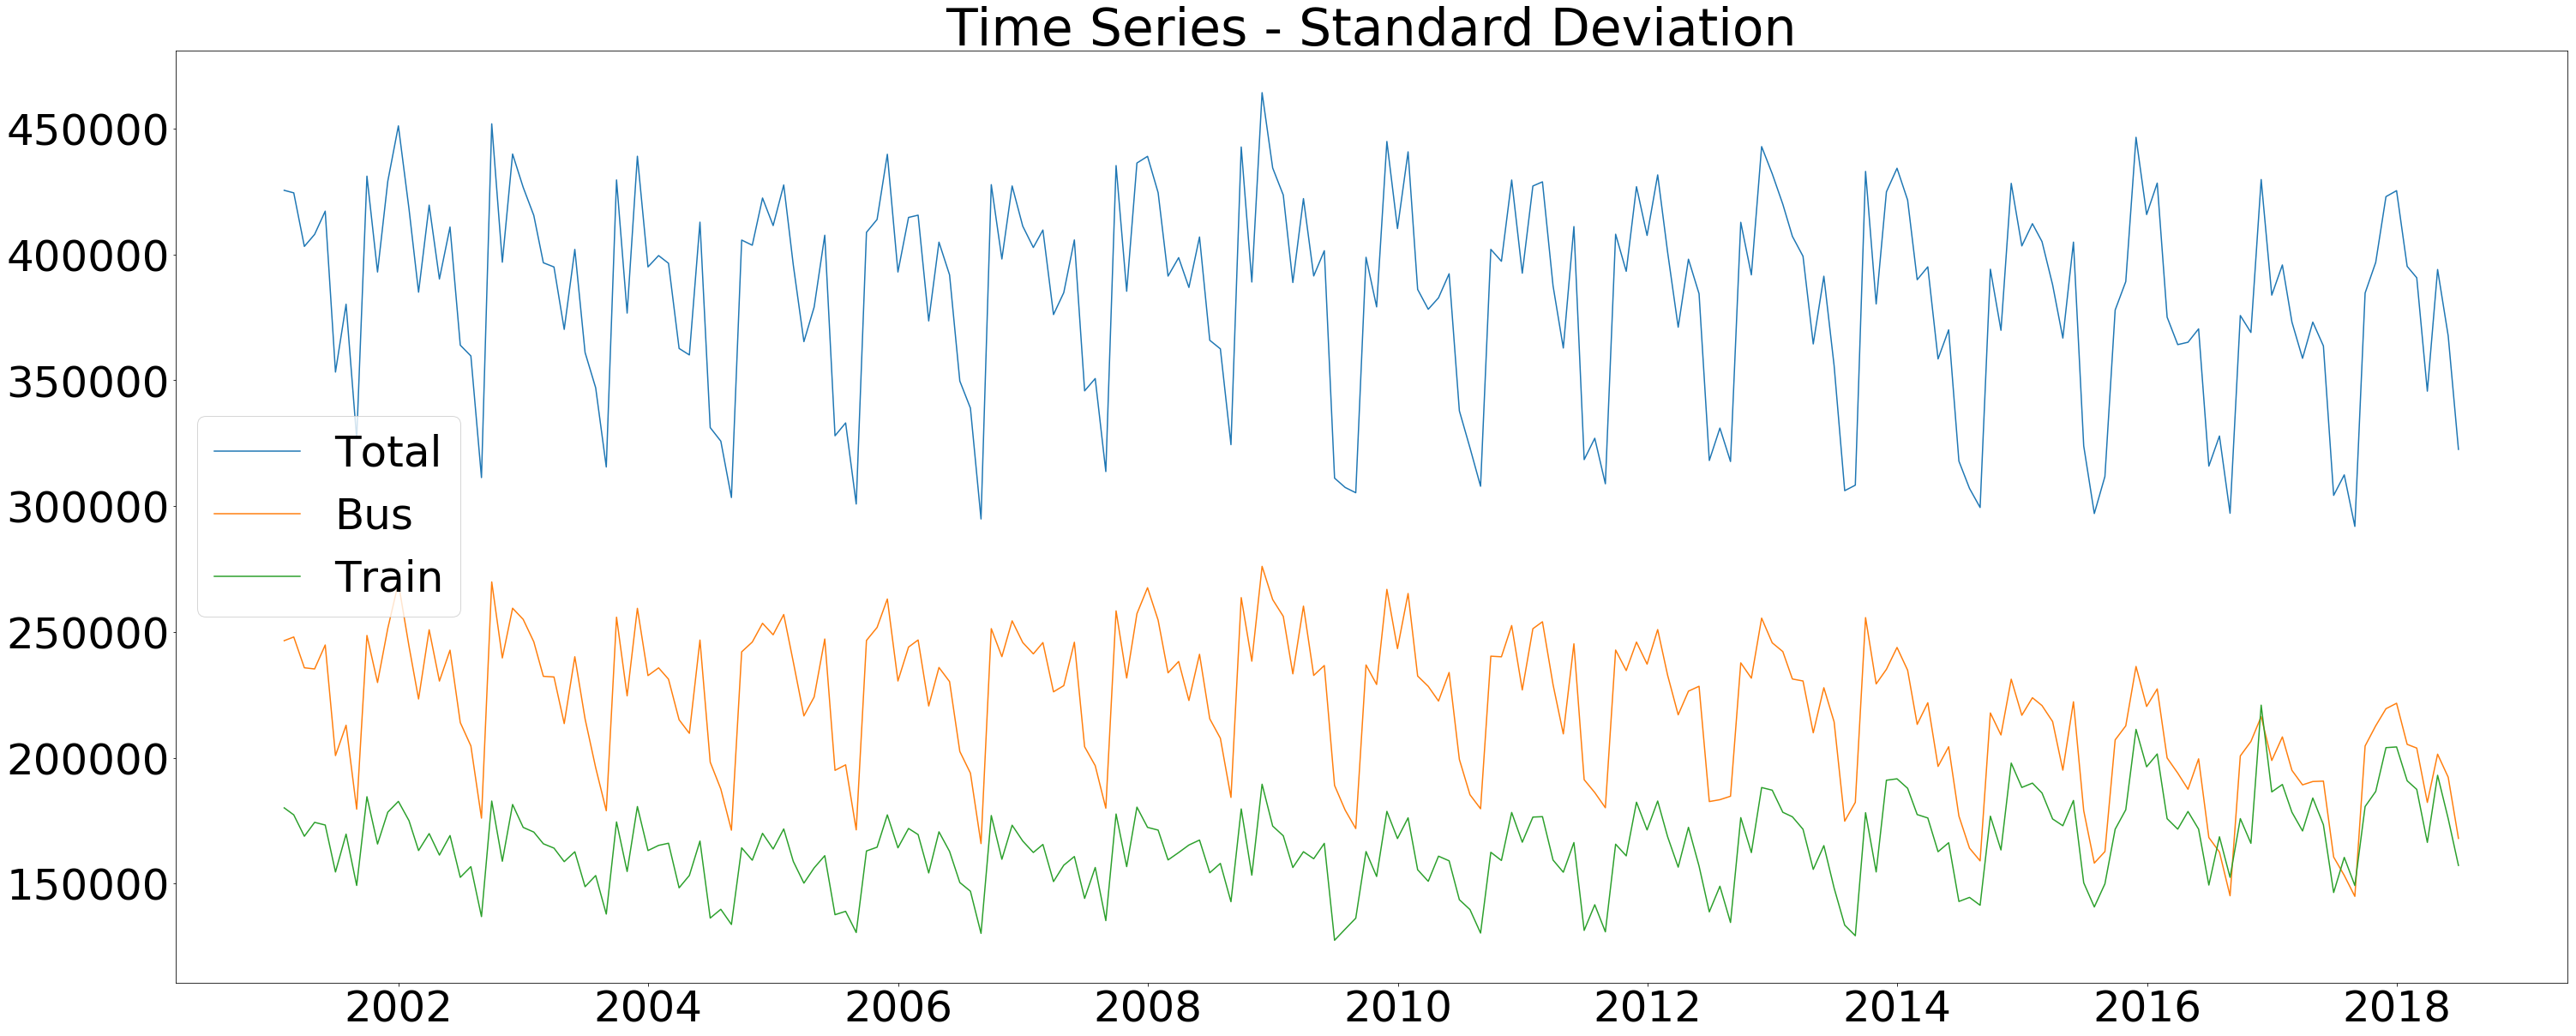

In [34]:

i=0
for data in list:
    total = data['total_rides']
    bus = data['bus']
    train = data['rail_boardings']



    plt.figure(figsize=(50, 20))
    plt.rcParams['font.size'] = 50

    #total
    plt.plot(data.index,total, label = 'Total')
    plt.legend(loc='best')
    
    #bus
    plt.plot(data.index,bus, label = 'Bus')
    plt.legend(loc='best')

    #train
    plt.plot(data.index,train, label = 'Train')
    plt.legend(loc='best')
    
    plt.title(name[i])
    plt.show()
    i+=1

In [48]:
df.drop(columns = ['bus', 'rail_boardings', 'day_type'], axis=1, inplace = True)
df_months = df.resample('M').mean()

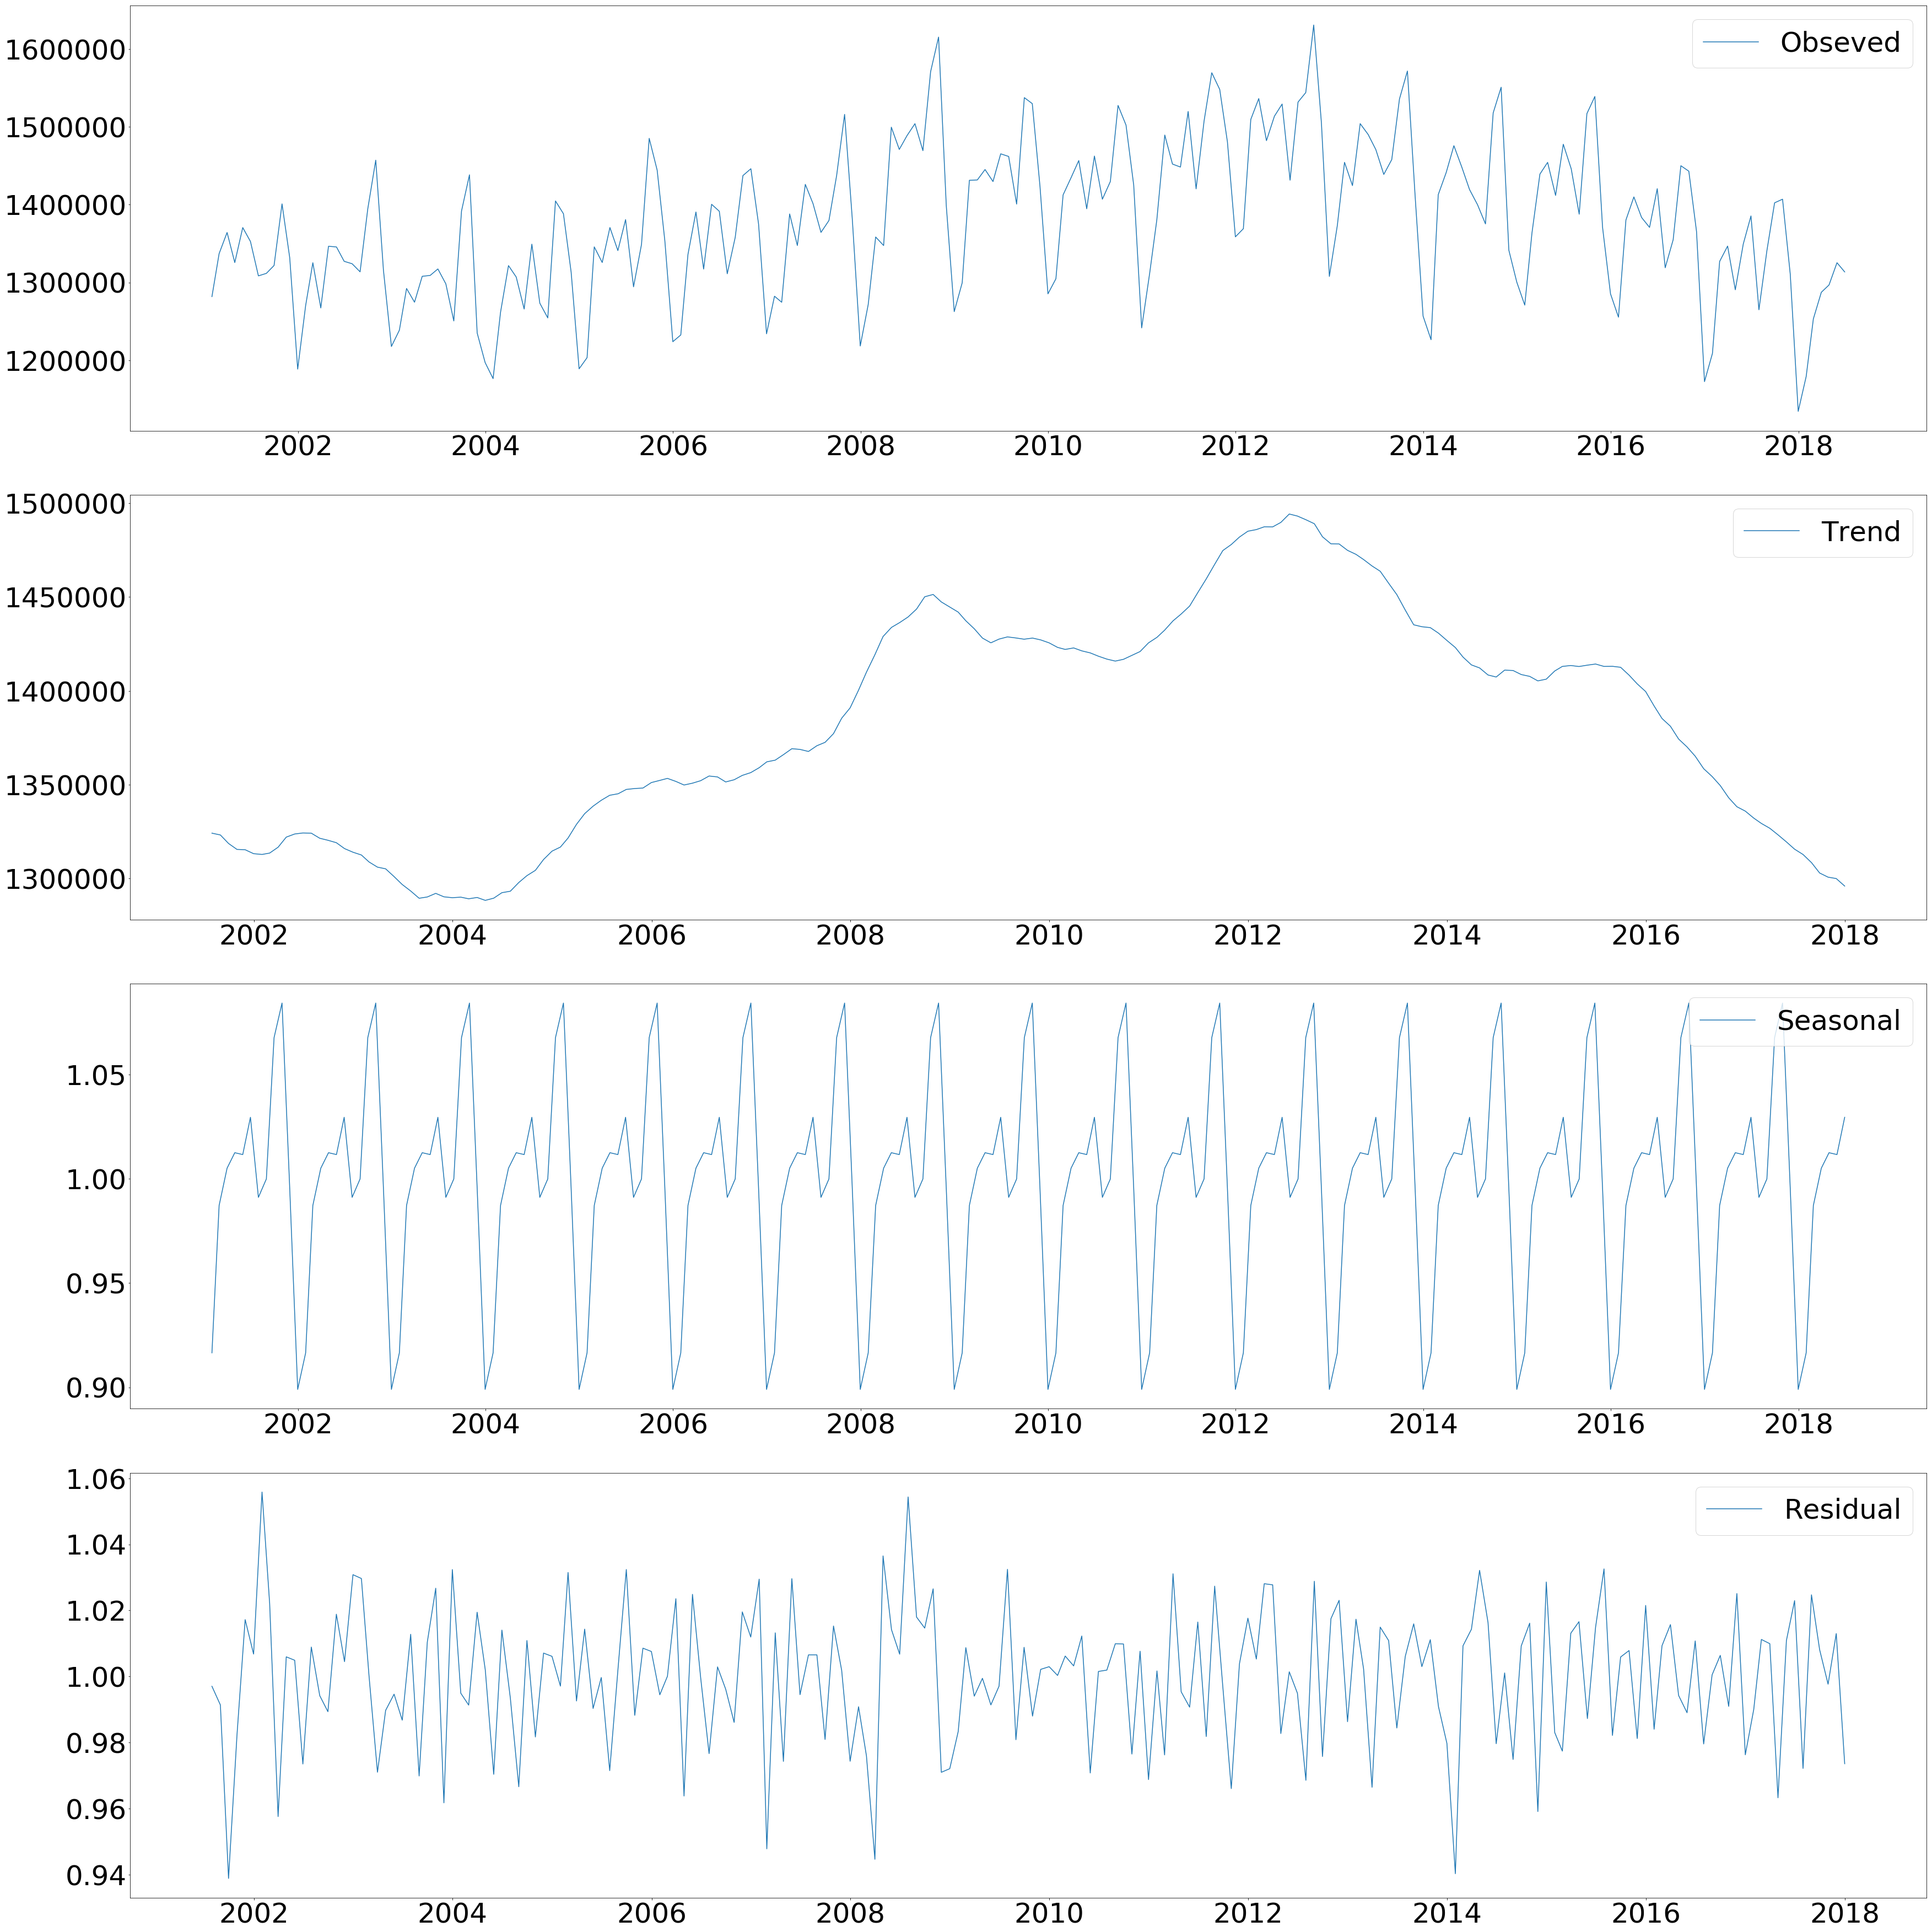

In [49]:
decomposition = sm.tsa.seasonal_decompose(df_months, model ='multiplicative', freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Plotting
plt.figure(figsize=(50, 50))
plt.rcParams['font.size'] = 50

#observed
plt.subplot(411)
plt.plot(df_months, label = 'Obseved')
plt.legend(loc='best')

#trend
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

#seasonality
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')

#residual
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()